In [16]:
import numpy as np
import pandas as pd

import itertools as it

import matplotlib.pyplot as plt
import seaborn as sns
from graphs import *
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [7]:
df = pd.read_pickle('data/interim/churn data.pickle')

In [8]:
X_train, X_val, y_train, y_val = train_test_split(df.drop('Churn',axis=1), df.Churn, test_size=0.3, random_state=1)

In [9]:
len(X_train)

4930

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_val)
print(classification_report(y_val, predictions))
print(roc_auc_score(predictions,y_val))

             precision    recall  f1-score   support

          0       0.84      0.80      0.82      1585
          1       0.48      0.55      0.51       528

avg / total       0.75      0.74      0.74      2113

0.6588877332034284


In [15]:
for n in range(2,20):
    dt = DecisionTreeClassifier(max_depth=n,random_state=42)
    dt.fit(X_train,y_train)
    print(n,roc_auc_score(dt.predict(X_val),y_val))

2 0.7062680949623625
3 0.7543922502313195
4 0.7264649100475221
5 0.7358347368639927
6 0.7270767201267888
7 0.7266126826574046
8 0.719702762052605
9 0.6882770377800713
10 0.6817917654409468
11 0.6742324171734714
12 0.6664002175095161
13 0.6762835378056761
14 0.6657901418732345
15 0.6639171199541941
16 0.6626930595539826
17 0.6613616460919658
18 0.655228497394396
19 0.6640354520020982


In [12]:
roc_auc_score(model.predict(X_val),y_val)

0.6588877332034284

Normalized confusion matrix
[[0.84095427 0.15904573]
 [0.52317881 0.47682119]]


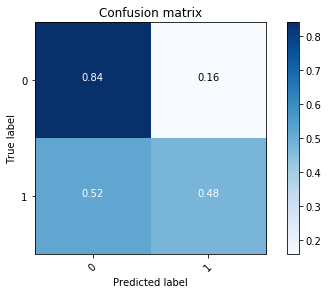

In [14]:
plot_confusion_matrixplot_con(cm=confusion_matrix(model.predict(X_val),y_val),
                              classes=y_val.unique(), normalize=True)

In [12]:
joblib.dump(model,'data/Models/Decision tree.pkl')

['data/Models/Decision tree.pkl']

In [7]:
from sklearn.linear_model import SGDClassifier

In [9]:
clf = SGDClassifier()
clf.fit(X_train,y_train)
roc_auc_score(y_val, clf.predict(X_val))

c:\users\riccardobranz\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.591678376023424